In [27]:
import pandas as pd

# Try reading with comma separation
try:
    koi_table = pd.read_csv("/content/koi_table.csv")
except:
    koi_table = pd.read_csv("/content/koi_table.csv", sep=',', on_bad_lines="skip")

try:
    kepler_stellar = pd.read_csv("/content/kepler_stellar.csv")
except:
    kepler_stellar = pd.read_csv("/content/kepler_stellar.csv", sep=',', on_bad_lines="skip")

print("KOI Table shape:", koi_table.shape)
print("Kepler Stellar shape:", kepler_stellar.shape)


KOI Table shape: (52, 1)
Kepler Stellar shape: (36, 1)


In [28]:
koi_table = pd.read_csv("/content/koi_table.csv", comment='#')
kepler_stellar = pd.read_csv("/content/kepler_stellar.csv", comment='#')

print("KOI columns:\n", koi_table.columns.tolist())
print("\nStellar columns:\n", kepler_stellar.columns.tolist())


KOI columns:
 ['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag']

Stellar columns:
 ['st_delivname', 'kepid', 'tm_designation', 'ra', 'dec', 'kepmag', 'teff', 'teff_err1', 'teff_err2', 'teff_prov', 'logg', 'logg_err1', 'logg_err2', 'logg_prov', 'feh', 'feh_er

In [29]:
merged_data = pd.merge(
    koi_table,
    kepler_stellar,
    left_on="kepid",   # from koi_table
    right_on="kepid",  # from kepler_stellar (adjust name if different)
    how="inner"
)
print("Shape of merged dataset:", merged_data.shape)
merged_data.head()


Shape of merged dataset: (47607, 81)


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,mass_err2,dens,dens_err1,dens_err2,prov_sec,nconfp,nkoi,ntce,st_quarters,st_vet_date
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.0,0,0,0,0,...,-0.0500,1.630,0.3872,-0.4467,DSEP,2,2,0,NaN,2018-01-06 0
1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,2013-03-27 0
2,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.0,0,0,0,0,...,-0.1240,1.315,0.4099,-0.8535,DSEP,2,2,2,1.111111e+16,2015-01-15 0
3,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.0,0,0,0,0,...,-0.1237,1.315,0.4099,-0.8535,DSEP,2,2,2,1.111111e+16,2013-12-03 0
4,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.0,0,0,0,0,...,-0.0460,1.623,0.3872,-0.4779,DSEP,2,2,2,1.111111e+16,2017-03-23 0


In [30]:
# Check how many missing values per column
print(merged_data.isnull().sum())

# Percentage of missing values
print((merged_data.isnull().mean() * 100).sort_values(ascending=False))


kepid                   0
kepoi_name              0
kepler_name         33881
koi_disposition         0
koi_pdisposition        0
                    ...  
nconfp                  0
nkoi                    0
ntce                    0
st_quarters         18919
st_vet_date             0
Length: 81, dtype: int64
koi_teq_err1    100.000000
koi_teq_err2    100.000000
kepler_name      71.168106
st_quarters      39.739954
mass_err1        20.667129
                   ...    
feh_prov          0.000000
nconfp            0.000000
nkoi              0.000000
ntce              0.000000
st_vet_date       0.000000
Length: 81, dtype: float64


In [31]:
# Drop duplicate rows if any
merged_data = merged_data.drop_duplicates()

# Drop columns with too many missing values (e.g., >40%)
threshold = 0.6  # keep columns with at least 60% data
merged_data = merged_data.loc[:, merged_data.isnull().mean() < threshold]


In [32]:
# Fill NaNs in numeric columns with median (better for skewed data)
num_cols = merged_data.select_dtypes(include=["float64", "int64"]).columns
for col in num_cols:
    merged_data[col] = merged_data[col].fillna(merged_data[col].median())


In [33]:
# Fill categorical NaNs with mode
cat_cols = merged_data.select_dtypes(include=["object"]).columns
for col in cat_cols:
    merged_data[col] = merged_data[col].fillna(merged_data[col].mode()[0])


In [34]:
print("Final shape after cleaning:", merged_data.shape)
print("Any NaNs left?", merged_data.isnull().sum().sum())


Final shape after cleaning: (47607, 78)
Any NaNs left? 0


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# ✅ General info
print(merged_data.info())
print(merged_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47607 entries, 0 to 47606
Data columns (total 78 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              47607 non-null  int64  
 1   kepoi_name         47607 non-null  object 
 2   koi_disposition    47607 non-null  object 
 3   koi_pdisposition   47607 non-null  object 
 4   koi_score          47607 non-null  float64
 5   koi_fpflag_nt      47607 non-null  int64  
 6   koi_fpflag_ss      47607 non-null  int64  
 7   koi_fpflag_co      47607 non-null  int64  
 8   koi_fpflag_ec      47607 non-null  int64  
 9   koi_period         47607 non-null  float64
 10  koi_period_err1    47607 non-null  float64
 11  koi_period_err2    47607 non-null  float64
 12  koi_time0bk        47607 non-null  float64
 13  koi_time0bk_err1   47607 non-null  float64
 14  koi_time0bk_err2   47607 non-null  float64
 15  koi_impact         47607 non-null  float64
 16  koi_impact_err1    476

In [37]:
# # ✅ Correlation heatmap (numeric features)
# plt.figure(figsize=(12,8))
# sns.heatmap(merged_data.corr(), cmap="coolwarm", annot=False)
# plt.title("Correlation Heatmap of Features", fontsize=14)
# plt.show()

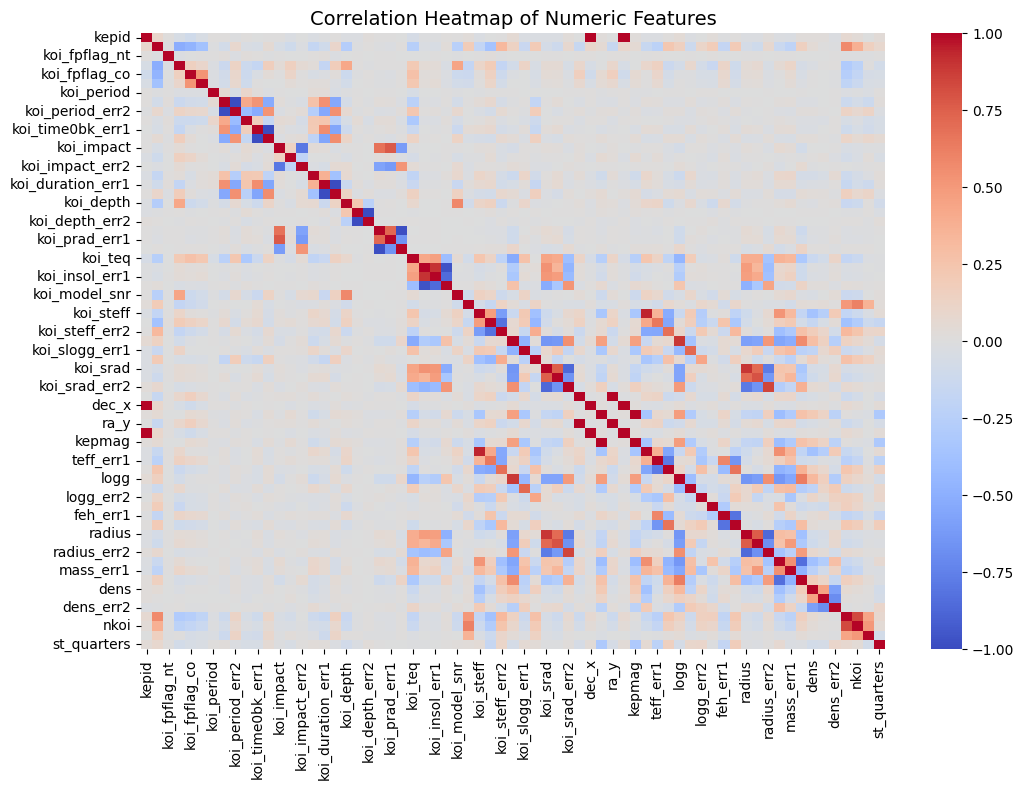

In [38]:
# Select only numeric columns
numeric_data = merged_data.select_dtypes(include=["int64", "float64"])

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()


In [39]:
print("Numeric columns used:", numeric_data.columns.tolist())
print("Excluded columns:", list(set(merged_data.columns) - set(numeric_data.columns)))


Numeric columns used: ['kepid', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra_x', 'dec_x', 'koi_kepmag', 'ra_y', 'dec_y', 'kepmag', 'teff', 'teff_err1', 'teff_err2', 'logg', 'logg_err1', 'logg_err2', 'feh', 'feh_err1', 'feh_err2', 'radius', 'radius_err1', 'radius_err2', 'mass', 'mass_err1', 'mass_err2', 'dens', 'dens_err1', 'dens_err2', 'nconfp', 'nkoi', 'ntce', 'st_quarters']
Excluded columns: ['koi_pdis

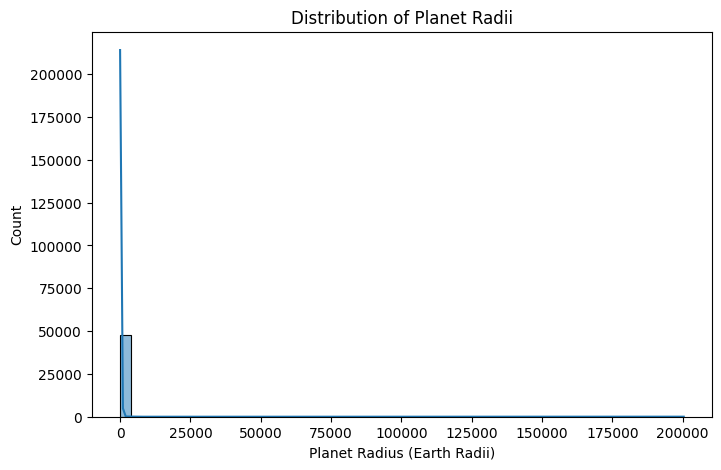

In [40]:
# ✅ Distribution of planet radius
plt.figure(figsize=(8,5))
sns.histplot(merged_data["koi_prad"], bins=50, kde=True)
plt.xlabel("Planet Radius (Earth Radii)")
plt.ylabel("Count")
plt.title("Distribution of Planet Radii")
plt.show()

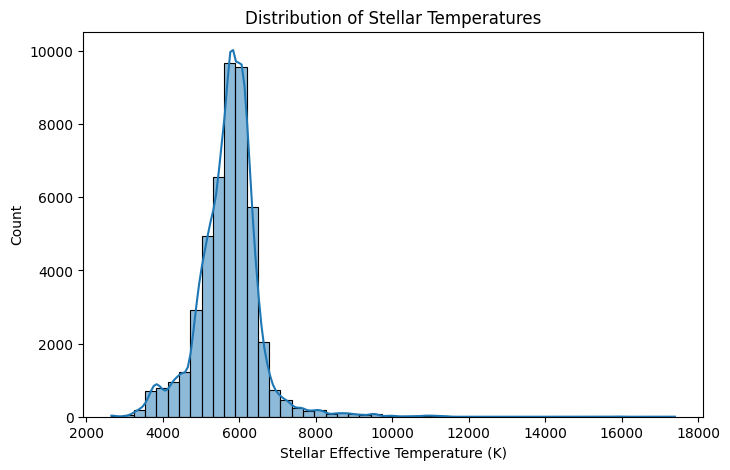

In [41]:
# ✅ Distribution of stellar temperature
plt.figure(figsize=(8,5))
sns.histplot(merged_data["teff"], bins=50, kde=True)
plt.xlabel("Stellar Effective Temperature (K)")
plt.ylabel("Count")
plt.title("Distribution of Stellar Temperatures")
plt.show()


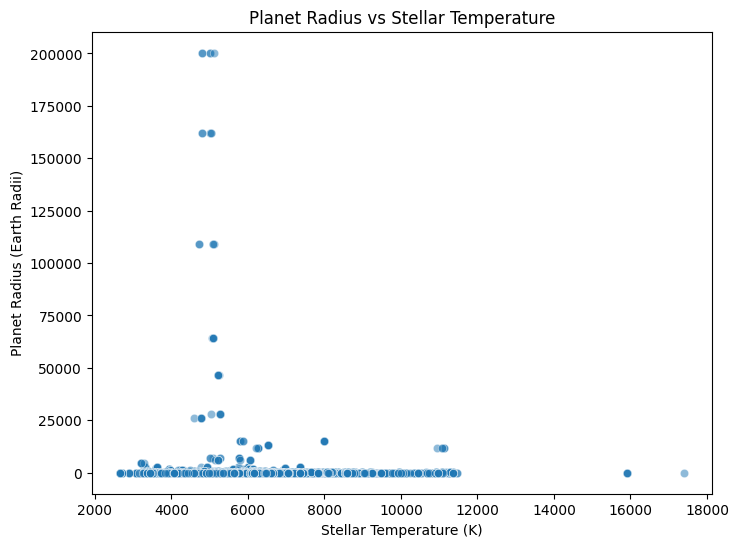

In [42]:
# ✅ Planet radius vs Stellar temperature
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_data, x="teff", y="koi_prad", alpha=0.5)
plt.xlabel("Stellar Temperature (K)")
plt.ylabel("Planet Radius (Earth Radii)")
plt.title("Planet Radius vs Stellar Temperature")
plt.show()

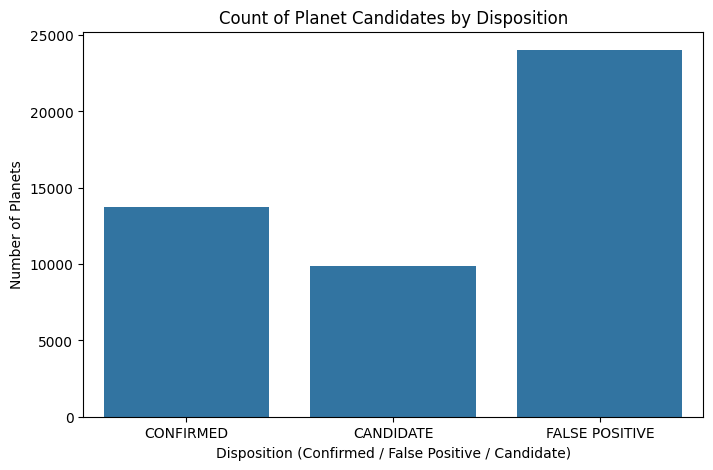

In [43]:
# ✅ Planet count per star
plt.figure(figsize=(8,5))
sns.countplot(x="koi_disposition", data=merged_data)
plt.title("Count of Planet Candidates by Disposition")
plt.xlabel("Disposition (Confirmed / False Positive / Candidate)")
plt.ylabel("Number of Planets")
plt.show()

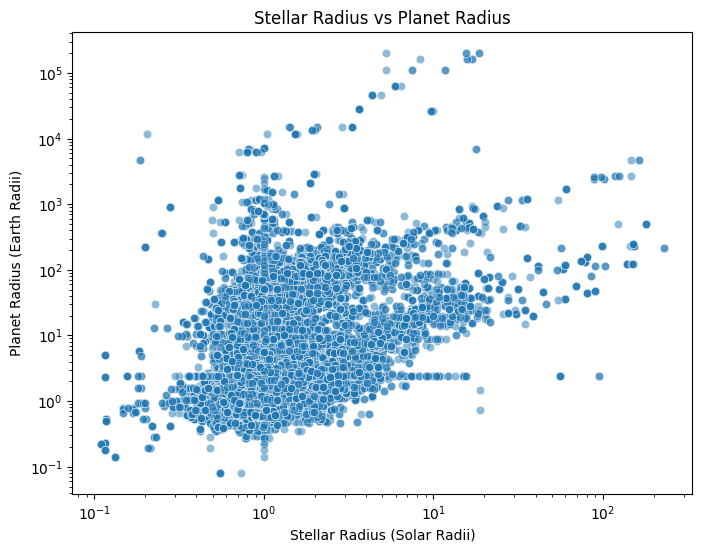

In [44]:
# ✅ Stellar radius vs Planet radius (log scale to handle skewness)
plt.figure(figsize=(8,6))
sns.scatterplot(x="radius", y="koi_prad", data=merged_data, alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Stellar Radius (Solar Radii)")
plt.ylabel("Planet Radius (Earth Radii)")
plt.title("Stellar Radius vs Planet Radius")
plt.show()

In [45]:
# Step 1: Print column names to check available features
print(merged_data.columns)

Index(['kepid', 'kepoi_name', 'koi_disposition', 'koi_pdisposition',
       'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff',
       'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra_x',
       'dec_x', 'koi_kepmag', 'st_delivname', 'tm_designation', 'ra_y',
       'dec_y', 'kepmag', 'teff', 'teff_err1', 'teff_err2', 'teff_prov',
       'logg', 'logg_err1', 'logg_err2', 'logg_prov',

In [46]:
# Step 2: Choose available features safely
possible_features = [
    "koi_period", "koi_prad", "koi_teq", "koi_insol",
    "koi_srad", "koi_steff", "koi_disposition"
]

In [47]:
# Add alternatives if available
if "koi_smass" in merged_data.columns:
    possible_features.append("koi_smass")
elif "st_mass" in merged_data.columns:
    possible_features.append("st_mass")

if "koi_logg" in merged_data.columns:
    possible_features.append("koi_logg")
elif "st_logg" in merged_data.columns:
    possible_features.append("st_logg")

In [48]:

# Step 3: Select only those columns
features = merged_data[possible_features]

print("Final features selected:", features.columns.tolist())
features.head()

Final features selected: ['koi_period', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_srad', 'koi_steff', 'koi_disposition']


,koi_period,koi_prad,koi_teq,koi_insol,koi_srad,koi_steff,koi_disposition
0,9.488036,2.26,793.0,93.59,0.927,5455.0,CONFIRMED
1,9.488036,2.26,793.0,93.59,0.927,5455.0,CONFIRMED
2,9.488036,2.26,793.0,93.59,0.927,5455.0,CONFIRMED
3,9.488036,2.26,793.0,93.59,0.927,5455.0,CONFIRMED
4,9.488036,2.26,793.0,93.59,0.927,5455.0,CONFIRMED


In [49]:
# Step 2: Feature engineering
# Relative insolation (Earth = 1)
features["rel_insol"] = features["koi_insol"]



/tmp/ipython-input-914800164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["rel_insol"] = features["koi_insol"]


In [50]:
# Planet size class
def planet_size(r):
    if r < 1.5: return "Rocky"
    elif r < 2.5: return "Super-Earth"
    elif r < 6: return "Mini-Neptune"
    else: return "Gas Giant"

features["planet_class"] = features["koi_prad"].apply(planet_size)


/tmp/ipython-input-2500745715.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["planet_class"] = features["koi_prad"].apply(planet_size)


In [51]:
# Habitable zone flag
features["hz_flag"] = ((features["rel_insol"] > 0.25) & (features["rel_insol"] < 2)).astype(int)



/tmp/ipython-input-1282508493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["hz_flag"] = ((features["rel_insol"] > 0.25) & (features["rel_insol"] < 2)).astype(int)


In [52]:
# Encode target variable
features["target"] = features["koi_disposition"].map({"CONFIRMED": 1, "FALSE POSITIVE": 0})



/tmp/ipython-input-2207358017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["target"] = features["koi_disposition"].map({"CONFIRMED": 1, "FALSE POSITIVE": 0})


In [53]:
# Step 3: Handle missing data
features = features.dropna(subset=["koi_prad", "koi_teq", "koi_insol"])

print("Engineered dataset shape:", features.shape)
features.head()


Engineered dataset shape: (47607, 11)


,koi_period,koi_prad,koi_teq,koi_insol,koi_srad,koi_steff,koi_disposition,rel_insol,planet_class,hz_flag,target
0,9.488036,2.26,793.0,93.59,0.927,5455.0,CONFIRMED,93.59,Super-Earth,0,1.0
1,9.488036,2.26,793.0,93.59,0.927,5455.0,CONFIRMED,93.59,Super-Earth,0,1.0
2,9.488036,2.26,793.0,93.59,0.927,5455.0,CONFIRMED,93.59,Super-Earth,0,1.0
3,9.488036,2.26,793.0,93.59,0.927,5455.0,CONFIRMED,93.59,Super-Earth,0,1.0
4,9.488036,2.26,793.0,93.59,0.927,5455.0,CONFIRMED,93.59,Super-Earth,0,1.0


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [55]:
# Step 4: Clean and select raw features
selected_columns = [
    "koi_period", "koi_prad", "koi_teq", "koi_insol",
    "koi_srad", "koi_steff", "koi_disposition"
]

In [56]:
# Keep only selected columns
cleaned_data = merged_data[selected_columns].copy()

In [57]:
# Drop rows with missing values
cleaned_data.dropna(inplace=True)

print("Shape after cleaning:", cleaned_data.shape)
print("Columns:", cleaned_data.columns)

Shape after cleaning: (47607, 7)
Columns: Index(['koi_period', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_srad',
       'koi_steff', 'koi_disposition'],
      dtype='object')


In [58]:
# Step 1: Map koi_disposition to binary target
cleaned_data["target"] = cleaned_data["koi_disposition"].map({
    "CONFIRMED": 1,
    "FALSE POSITIVE": 0,
    "CANDIDATE": 0  # treat candidate as not confirmed (can refine later)
})


In [59]:
# Step 2: Drop original disposition
cleaned_data = cleaned_data.drop(columns=["koi_disposition"])

In [60]:
# Step 3: Define X (features) and y (target)
X = cleaned_data.drop(columns=["target"])
y = cleaned_data["target"]

In [61]:
# Step 4: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [62]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Target class distribution:\n", y.value_counts())


Train set shape: (38085, 6)
Test set shape: (9522, 6)
Target class distribution:
 target
0    33886
1    13721
Name: count, dtype: int64


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [64]:
# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [65]:
# Train on training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [66]:
# Predictions
y_pred = log_reg.predict(X_test)


In [67]:
# Evaluation
print("Baseline Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Baseline Logistic Regression Results:
Accuracy: 0.7293635790800252

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83      6778
           1       0.58      0.22      0.32      2744

    accuracy                           0.73      9522
   macro avg       0.66      0.58      0.58      9522
weighted avg       0.70      0.73      0.68      9522


Confusion Matrix:
 [[6333  445]
 [2132  612]]


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [69]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

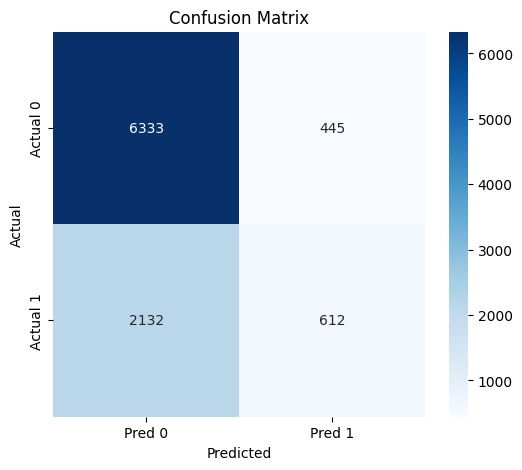

In [70]:
# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['Actual 0','Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest Results:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6778
           1       1.00      1.00      1.00      2744

    accuracy                           1.00      9522
   macro avg       1.00      1.00      1.00      9522
weighted avg       1.00      1.00      1.00      9522



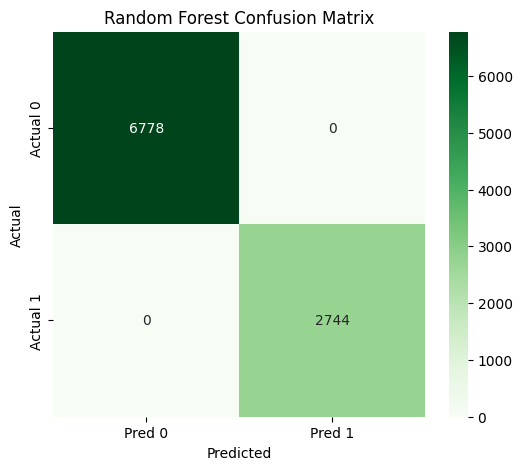

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Initialize Random Forest with class balancing
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

# ✅ Train the model
rf_model.fit(X_train, y_train)

# ✅ Make predictions
y_pred = rf_model.predict(X_test)

# ✅ Evaluation
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred 0','Pred 1'], yticklabels=['Actual 0','Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [72]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
# Logistic Regression (baseline)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# XGBoost
xgb_model = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)


In [74]:
# Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# XGBoost
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:24:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Logistic Regression ---
Accuracy: 0.7293635790800252
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83      6778
           1       0.58      0.22      0.32      2744

    accuracy                           0.73      9522
   macro avg       0.66      0.58      0.58      9522
weighted avg       0.70      0.73      0.68      9522



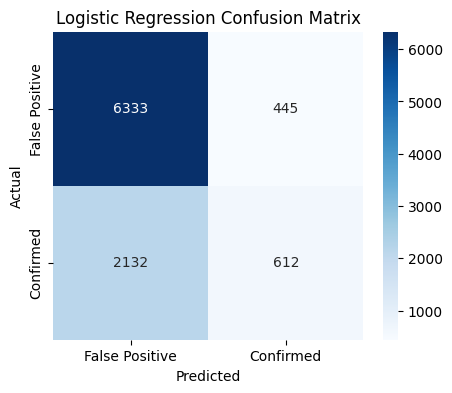

--- Random Forest ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6778
           1       1.00      1.00      1.00      2744

    accuracy                           1.00      9522
   macro avg       1.00      1.00      1.00      9522
weighted avg       1.00      1.00      1.00      9522



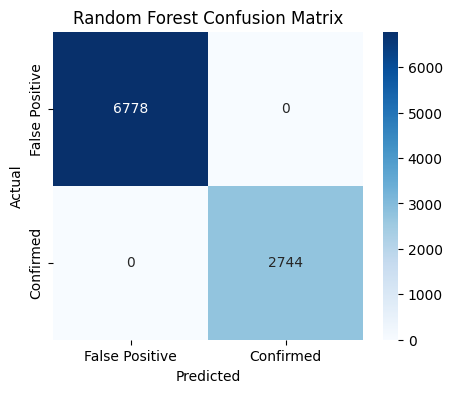

--- XGBoost ---
Accuracy: 0.9869775257298887
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      6778
           1       0.97      0.99      0.98      2744

    accuracy                           0.99      9522
   macro avg       0.98      0.99      0.98      9522
weighted avg       0.99      0.99      0.99      9522



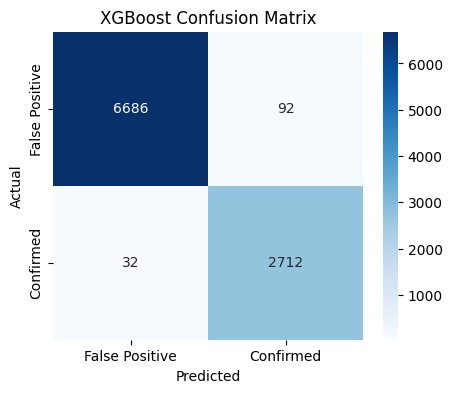

In [75]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False Positive','Confirmed'], yticklabels=['False Positive','Confirmed'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# Evaluate all
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


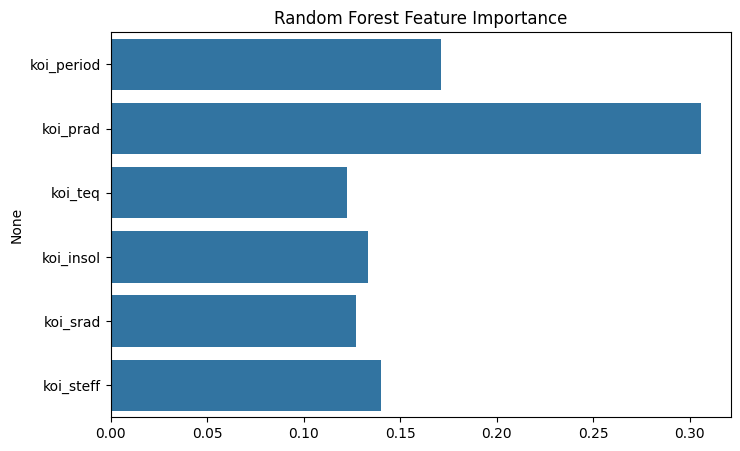

In [76]:
# Random Forest feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Random Forest Feature Importance")
plt.show()


In [77]:
# Using habitable zone flag (assuming you already created 'hz_flag')
habitable_planets = cleaned_data[(cleaned_data['target']==1) & (cleaned_data['koi_insol']>0.25) & (cleaned_data['koi_insol']<2)]
print("Number of potentially habitable confirmed planets:", habitable_planets.shape[0])
habitable_planets[['koi_prad', 'koi_period', 'koi_srad', 'koi_steff', 'koi_insol']]


Number of potentially habitable confirmed planets: 414


,koi_prad,koi_period,koi_srad,koi_steff,koi_insol
430,1.83,46.184204,0.493,3950.0,1.32
431,1.83,46.184204,0.493,3950.0,1.32
432,1.83,46.184204,0.493,3950.0,1.32
433,1.83,46.184204,0.493,3950.0,1.32
434,1.83,46.184204,0.493,3950.0,1.32
...,...,...,...,...,...
44871,1.09,384.847556,0.798,5579.0,0.56
44872,1.09,384.847556,0.798,5579.0,0.56
44873,1.09,384.847556,0.798,5579.0,0.56
44874,1.09,384.847556,0.798,5579.0,0.56


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns


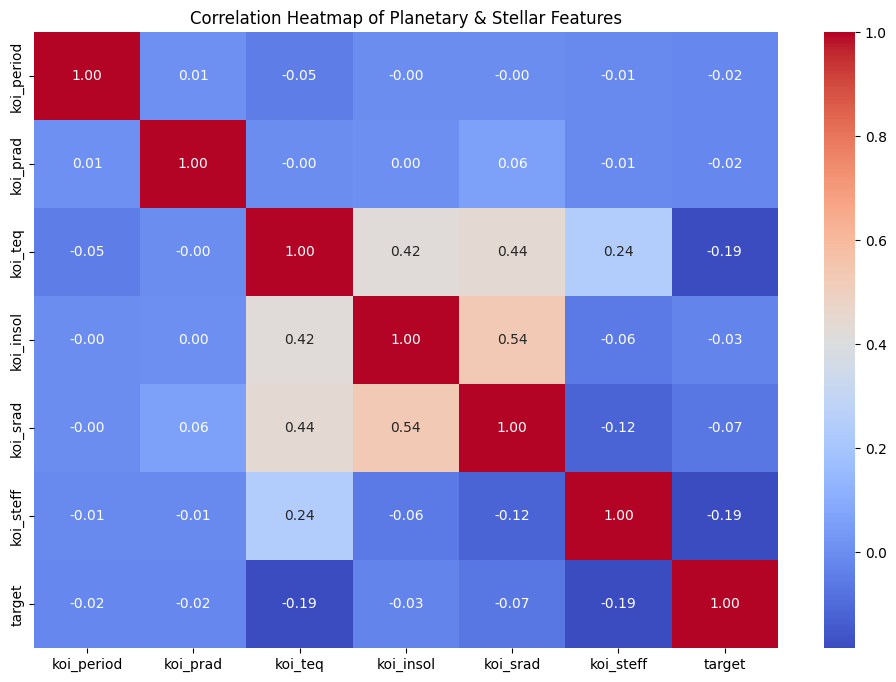

In [79]:
plt.figure(figsize=(12,8))
sns.heatmap(cleaned_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Planetary & Stellar Features")
plt.show()


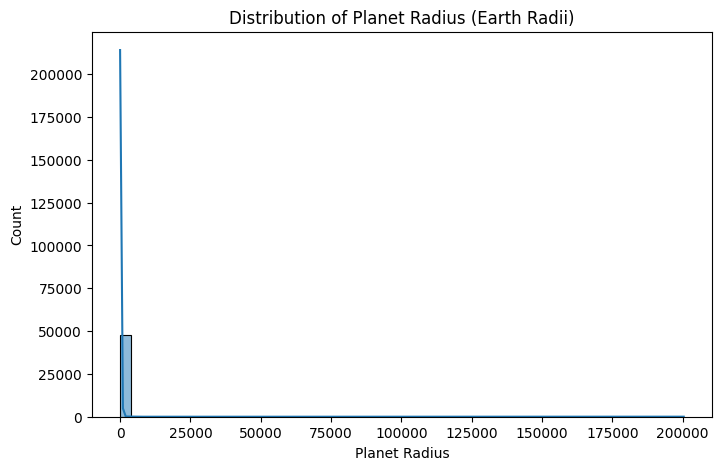

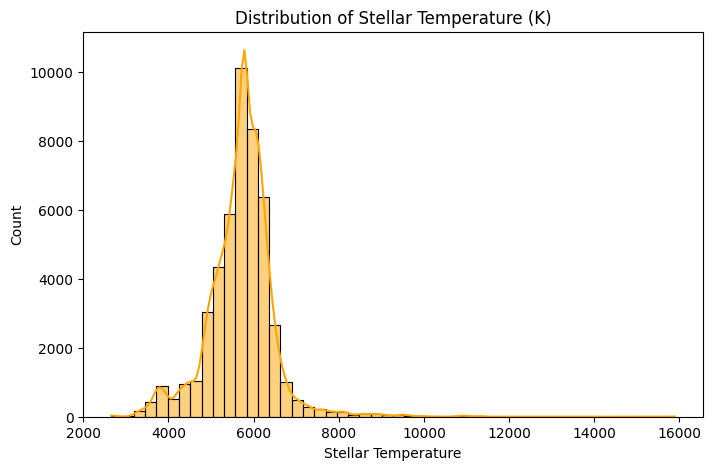

In [80]:
# Planet radius
plt.figure(figsize=(8,5))
sns.histplot(cleaned_data['koi_prad'], bins=50, kde=True)
plt.title("Distribution of Planet Radius (Earth Radii)")
plt.xlabel("Planet Radius")
plt.ylabel("Count")
plt.show()

# Stellar temperature
plt.figure(figsize=(8,5))
sns.histplot(cleaned_data['koi_steff'], bins=50, kde=True, color='orange')
plt.title("Distribution of Stellar Temperature (K)")
plt.xlabel("Stellar Temperature")
plt.ylabel("Count")
plt.show()


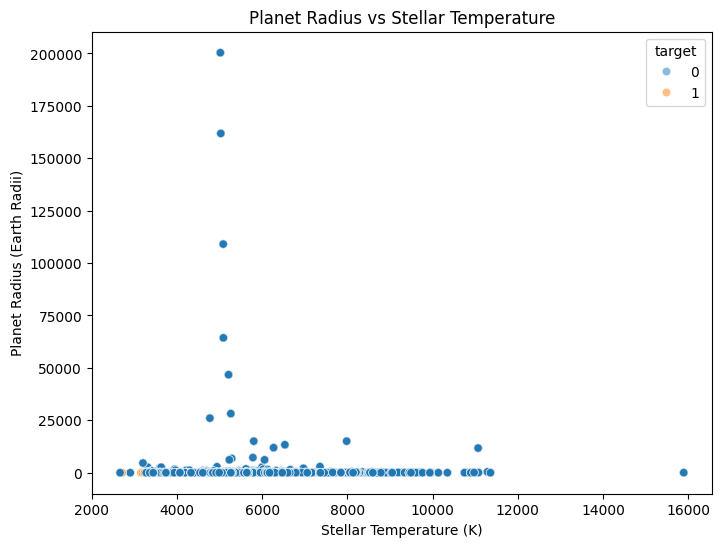

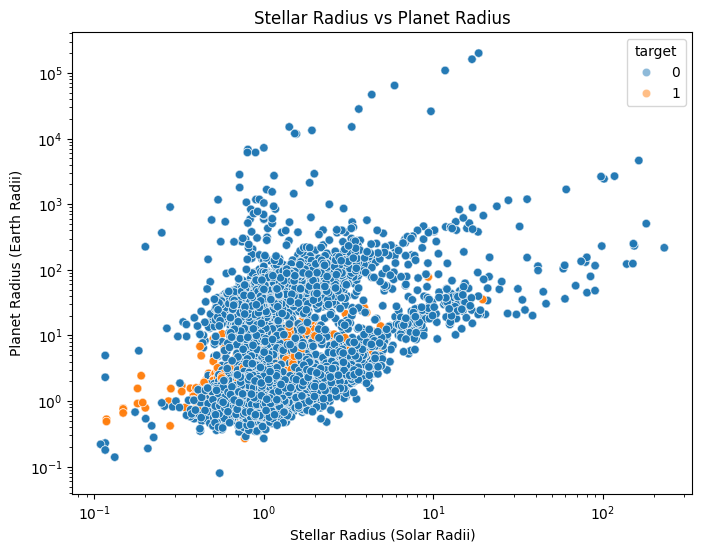

In [81]:
# Planet radius vs Stellar temperature
plt.figure(figsize=(8,6))
sns.scatterplot(data=cleaned_data, x='koi_steff', y='koi_prad', hue='target', alpha=0.5)
plt.title("Planet Radius vs Stellar Temperature")
plt.xlabel("Stellar Temperature (K)")
plt.ylabel("Planet Radius (Earth Radii)")
plt.show()

# Stellar radius vs Planet radius (log scale)
plt.figure(figsize=(8,6))
sns.scatterplot(data=cleaned_data, x='koi_srad', y='koi_prad', hue='target', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title("Stellar Radius vs Planet Radius")
plt.xlabel("Stellar Radius (Solar Radii)")
plt.ylabel("Planet Radius (Earth Radii)")
plt.show()


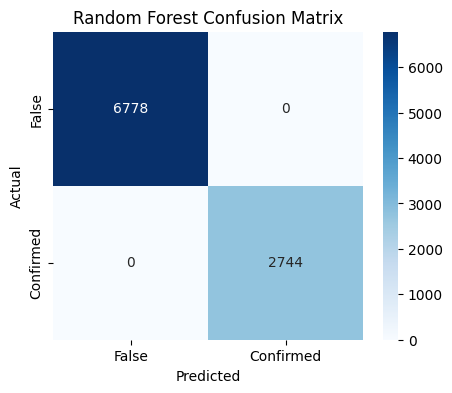

In [82]:
# Function to plot
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False','Confirmed'], yticklabels=['False','Confirmed'])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Example for Random Forest
plot_cm(y_test, y_pred_rf, "Random Forest Confusion Matrix")


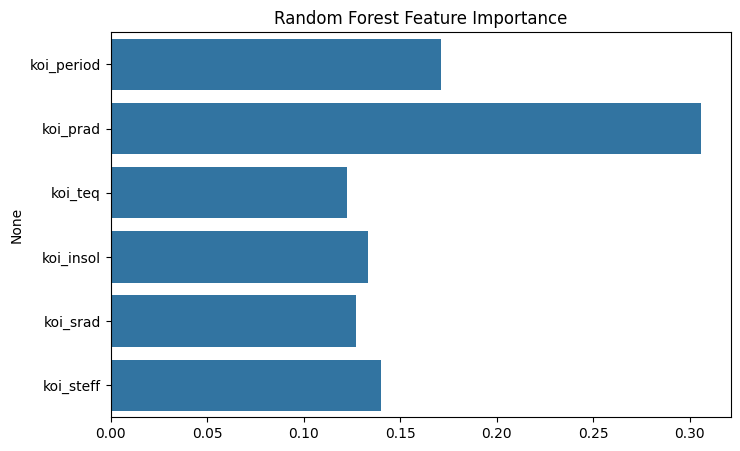

In [83]:
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Random Forest Feature Importance")
plt.show()


In [84]:
habitable_planets = cleaned_data[(cleaned_data['target']==1) & (cleaned_data['koi_insol']>0.25) & (cleaned_data['koi_insol']<2)]
print(f"Number of potentially habitable confirmed planets: {habitable_planets.shape[0]}")
habitable_planets[['koi_prad', 'koi_period', 'koi_srad', 'koi_steff', 'koi_insol']]


Number of potentially habitable confirmed planets: 414


,koi_prad,koi_period,koi_srad,koi_steff,koi_insol
430,1.83,46.184204,0.493,3950.0,1.32
431,1.83,46.184204,0.493,3950.0,1.32
432,1.83,46.184204,0.493,3950.0,1.32
433,1.83,46.184204,0.493,3950.0,1.32
434,1.83,46.184204,0.493,3950.0,1.32
...,...,...,...,...,...
44871,1.09,384.847556,0.798,5579.0,0.56
44872,1.09,384.847556,0.798,5579.0,0.56
44873,1.09,384.847556,0.798,5579.0,0.56
44874,1.09,384.847556,0.798,5579.0,0.56


In [85]:
new_planet = {
    "koi_period": 365,    # orbital period in days
    "koi_prad": 1.1,      # planet radius (Earth radii)
    "koi_teq": 290,       # equilibrium temperature
    "koi_insol": 1,       # relative insolation (Earth=1)
    "koi_srad": 1,        # stellar radius (Solar radii)
    "koi_steff": 5778     # stellar temperature (K)
}

# Convert to DataFrame
import pandas as pd
new_X = pd.DataFrame([new_planet])


In [86]:
new_X_scaled = scaler.transform(new_X)  # Use the same StandardScaler fitted on training data


In [87]:
# Using Random Forest as example
prediction = rf_model.predict(new_X_scaled)
probability = rf_model.predict_proba(new_X_scaled)

print("Predicted Confirmation Status:", "Confirmed" if prediction[0]==1 else "False Positive")
print("Probability of being Confirmed:", probability[0][1])


Predicted Confirmation Status: False Positive
Probability of being Confirmed: 0.105


In [88]:
def predict_habitability(new_planet_dict, model=rf_model, scaler=scaler):
    """
    Predicts habitability/confirmation status for a new exoplanet.

    Parameters:
    - new_planet_dict: dict with keys ["koi_period","koi_prad","koi_teq","koi_insol","koi_srad","koi_steff"]
    - model: trained ML model (default Random Forest)
    - scaler: fitted StandardScaler object

    Returns:
    - prediction: "Confirmed" or "False Positive"
    - probability: probability of being confirmed
    """
    import pandas as pd

    # Convert dict to DataFrame
    new_X = pd.DataFrame([new_planet_dict])

    # Scale features
    new_X_scaled = scaler.transform(new_X)

    # Predict
    pred = model.predict(new_X_scaled)[0]
    prob = model.predict_proba(new_X_scaled)[0][1]

    return "Confirmed" if pred==1 else "False Positive", prob


In [89]:
new_planet = {
    "koi_period": 365,    # orbital period in days
    "koi_prad": 1.1,      # planet radius (Earth radii)
    "koi_teq": 290,       # equilibrium temperature
    "koi_insol": 1,       # relative insolation (Earth=1)
    "koi_srad": 1,        # stellar radius (Solar radii)
    "koi_steff": 5778     # stellar temperature (K)
}

prediction, probability = predict_habitability(new_planet)
print("Prediction:", prediction)
print("Probability of being Confirmed:", round(probability, 2))


Prediction: False Positive
Probability of being Confirmed: 0.1


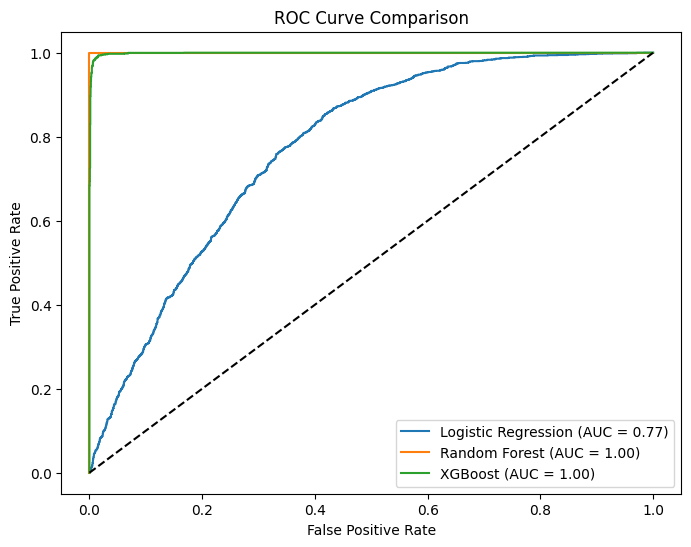

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score

# ✅ Get prediction probabilities for ROC Curve
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# ✅ ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

# ✅ AUC Scores
auc_lr = roc_auc_score(y_test, y_proba_lr)
auc_rf = roc_auc_score(y_test, y_proba_rf)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# ✅ Plot ROC Curve Comparison
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")

plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()
